In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
datos, metadatos = tfds.load("mnist", as_supervised=True, with_info=True)

c:\Users\edgar\miniforge3\envs\deep_learning_python3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 4/4 [00:00<00:00, 81.39 url/s]
Extraction completed...: 0 file [00:00, ? file/s]
Dl Completed...: 100%|██████████| 4/4 [00:00<00:00, 75.25 url/s]


Dataset mnist downloaded and prepared to C:\Users\edgar\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [3]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\edgar\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

In [4]:
datos_entrenamiento, datos_prueba = datos['train'], datos['test']

In [6]:
nombres_clases = metadatos.features['label'].names

In [7]:
#Normalizar los datos
#0-255 1 byte
#Transformar 0-255 a 0-1 (0=0,255=1,127=0.5)
#Normalizar los datos ent y prueba con una funcion  
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes = imagenes / 255.0
  return imagenes,etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)  
datos_pruebas = datos_prueba.map(normalizar)

#Agregar en cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_prueba = datos_prueba.cache()

In [8]:
datos_entrenamiento.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

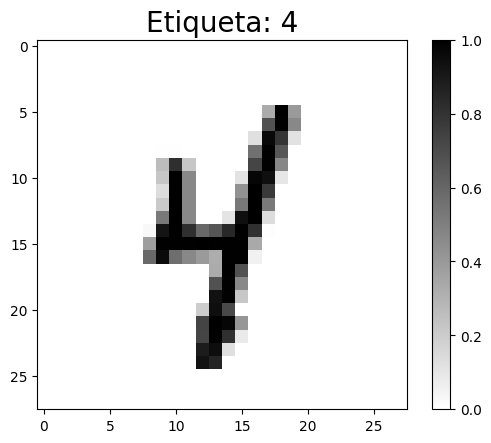

In [20]:
#Vamos a iterar
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

plt.figure()
plt.title(f'Etiqueta: {etiqueta}', fontsize=20)
plt.imshow(imagen,cmap=plt.cm.binary)
plt.colorbar()
plt.show()

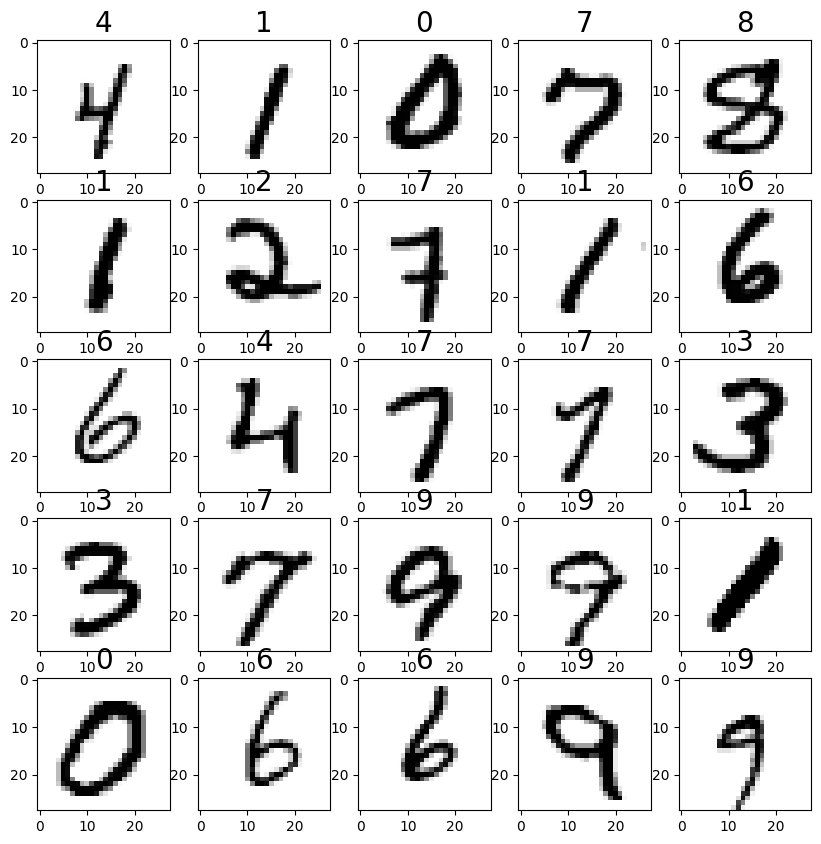

In [25]:
plt.figure(figsize=(10,10))
#Vamos a iterar 25 fotos
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    plt.subplot(5,5,i+1)
    plt.title(f'{etiqueta}', fontsize=20)
    plt.imshow(imagen,cmap=plt.cm.binary)
    #plt.colorbar()

plt.show()

In [ ]:
modelo = tf.keras.Sequential([
    #784 datos de entrada
    tf.keras.layers.Flatten(input_shape=(28,28,1)),#1 = blanco y negro
    # # # Capa oculta
    #----------------------------------------------------------------------------------------------------
    # Neuronas Lineales, sin activación
    #----------------------------------------------------------------------------------------------------
    #tf.keras.layers.Dense(1), Con una capa oculta con 1 neurona solo se obtiene un Accuracy del 38%
    # Agregamos dos capas de 50 neuronas y logramos un accuracy del 92%
    #tf.keras.layers.Dense(50),
    #tf.keras.layers.Dense(50),
    #--------------------------FIN DE Neuronas Lineales--------------------------------------------------
    # Para mejorar el accuracy vamos a agregar la función de Activación, se logra 98%
    tf.keras.layers.Dense(50, activation=tf.nn.relu), # para negativos retorna cero, y positivos el mismo numero.
    tf.keras.layers.Dense(50, activation=tf.nn.relu),    
    #Capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

c:\Users\edgar\miniforge3\envs\deep_learning_python3.10\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
modelo.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [28]:
TAMANO_LOTE = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_prueba = datos_prueba.batch(TAMANO_LOTE)

In [35]:
import math
#Entrenamiento
modelo.fit(datos_entrenamiento, epochs=10, steps_per_epoch=math.ceil(60000/TAMANO_LOTE))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8372 - loss: 0.5476
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9519 - loss: 0.1625
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9659 - loss: 0.1129
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9726 - loss: 0.0881
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9778 - loss: 0.0700
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9803 - loss: 0.0624
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9805 - loss: 0.0598
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9849 - loss: 0.0467
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9859 - loss: 0.0420
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9881 - loss: 0.0376
